<a href="https://colab.research.google.com/github/Thien24112001/BaiTapAI_Tuan15_19146395/blob/main/Emotion_VoHoangThien_19146395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import load_img
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#link drive: https://drive.google.com/drive/folders/1kCcnQFruV7eetJhxozaNgo0J0mSQdaCP?usp=sharing

In [ ]:
def create_img_dataset(raw_folder,dataset_name):

    target_size = (150, 150)
    pictures = []
    labels = []

    for folder in listdir(raw_folder):
      print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        print("File=", file)
        pictures.append(cv2.resize(cv2.imread((raw_folder + "/" + folder + "/" + file),cv2.IMREAD_GRAYSCALE)
                                              ,dsize = target_size))
        labels.append(folder)

    pictures = np.array(pictures)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)

    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)

    file.close()

def load_data(dataset_path):

    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()

    return pictures, labels

raw_folder = "/content/drive/MyDrive/CamXuc"

create_img_dataset(raw_folder= raw_folder,dataset_name= 'CamXuc.txt')
dataset_path = "CamXuc.txt"
x_data,y_data = load_data(dataset_path= 'CamXuc.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)


Folder= NgacNhien
File= 1.jpg
File= 2.jpg
File= 3.jpg
File= 4.jpg
File= 5.jpg
File= 6.jpg
File= 7.jpg
File= 8.jpg
File= 9.jpg
File= 10.jpg
File= 11.jpg
File= 12.jpg
File= 13.jpg
File= 14.jpg
File= 15.jpg
File= 16.jpg
File= 17.jpg
File= 18.jpg
File= 19.jpg
File= 20.jpg
File= 21.jpg
File= 22.jpg
File= 23.jpg
File= 24.jpg
File= 25.jpg
File= 26.jpg
File= 27.jpg
File= 28.jpg
File= 29.jpg
File= 30.jpg
Folder= Buon
File= 1.jpg
File= 2.jpg
File= 3.jpg
File= 4.jpg
File= 5.jpg
File= 6.jpg
File= 7.jpg
File= 8.jpg
File= 9.jpg
File= 10.jpg
File= 11.jpg
File= 12.jpg
File= 13.jpg
File= 14.jpg
File= 15.jpg
File= .jpg
File= 17.jpg
File= 18.jpg
File= 19.jpg
File= 20.jpg
File= 21.jpg
File= 22.jpg
File= 23.jpg
File= 24.jpg
File= 25.jpg
File= 26.jpg
File= 27.jpg
File= 28.jpg
File= 29.jpg
File= 30.jpg
Folder= HanhPhuc
File= 1.jpg
File= 2.jpg
File= 3.jpg
File= 4.jpg
File= 5.jpg
File= 6.jpg
File= 7.jpg
File= 8.jpg
File= 9.jpg
File= 10.jpg
File= 11.jpg
File= 12.jpg
File= 13.jpg
File= 14.jpg
File= 15.jpg
File= 

In [ ]:
#reshap dữ liệu
x_train = x_train.astype('float32')
x_train = x_train/255.0



In [ ]:
x_label = ['Buon','Gian','HanhPhuc','NgacNhien']

In [ ]:
model = Sequential()
#Lock1
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150, 150, 1)))
model.add(Conv2D(128,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#Lock2
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#lock3
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 128)     1280      
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 128)     147584    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 64)        73792     
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100,verbose=1)

Epoch 1/100
3/3 [==============================] - 4s 1s/step - loss: 783.3821 - accuracy: 0.2553
Epoch 2/100
3/3 [==============================] - 0s 153ms/step - loss: 207.3564 - accuracy: 0.2340
Epoch 3/100
3/3 [==============================] - 0s 153ms/step - loss: 50.7327 - accuracy: 0.2660
Epoch 4/100
3/3 [==============================] - 0s 152ms/step - loss: 7.6849 - accuracy: 0.2660
Epoch 5/100
3/3 [==============================] - 0s 152ms/step - loss: 7.2352 - accuracy: 0.3723
Epoch 6/100
3/3 [==============================] - 0s 152ms/step - loss: 11.3167 - accuracy: 0.2979
Epoch 7/100
3/3 [==============================] - 0s 151ms/step - loss: 2.4121 - accuracy: 0.4362
Epoch 8/100
3/3 [==============================] - 0s 151ms/step - loss: 1.6175 - accuracy: 0.3830
Epoch 9/100
3/3 [==============================] - 0s 151ms/step - loss: 1.3743 - accuracy: 0.4468
Epoch 10/100
3/3 [==============================] - 0s 150ms/step - loss: 1.4713 - accuracy: 0.4255
Epoch 

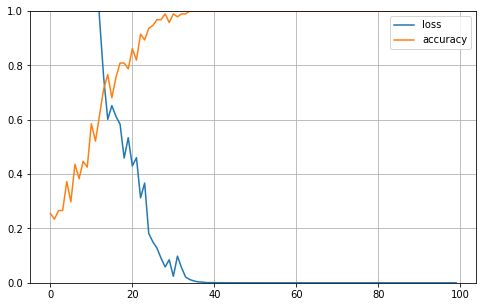

In [ ]:
#Ve do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

predic: [0]
predic label: Buon


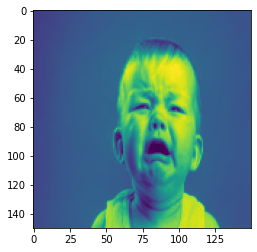

In [ ]:
i = 17
sample = np.array([x_test[i]])
plt.imshow(x_test[i])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predic:", predictions)
print("predic label:", x_label[int(predictions)])